In [1]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plot
from scipy.fft import fft, ifft
import pandas as pd
import random

In [33]:
a = np.load('numpydata.npy',allow_pickle=True)
df = pd.DataFrame(a, columns = ['Signal','Class','Sag','Swell','Intrpn','Harmonic','Flicker','Transient'])

In [38]:
df['Class'].value_counts()

52     360
51     360
4      345
42     324
41     324
425    320
415    320
0      300
65     288
45     270
2      180
1      180
5      160
6      140
3       90
Name: Class, dtype: int64

In [2]:
model1.save('mod1n')
model2.save('mod2n')
model3.save('mod3n')
model4.save('mod4n')
model5.save('mod5n')
model6.save('mod6n')

NameError: name 'model' is not defined

In [1]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from numpy import array
from keras.utils import np_utils


import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Input, Concatenate, GlobalMaxPooling1D
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, MaxPooling1D, AveragePooling1D
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

Using TensorFlow backend.


In [2]:
model = tf.keras.models.load_model('model3_99')

In [3]:
a = np.load('numpydata_noise.npy',allow_pickle=True)
df = pd.DataFrame(a, columns = ['Signal','Class','Sag','Swell','Intrpn','Harmonic','Flicker','Transient'])
df.info(True)

signal = df.iloc[:, 0]
classes = np.array(df.iloc[:,1]).astype('int32')
# classes = np.reshape(classes, (-1,1)).astype('float32')
#print(signal[0].shape, classes.shape)
df2=df.drop(['Signal','Class'],axis=1)
df2=df2.astype(str).astype('float32')
yarr=np.array(df2.iloc[:,:]).astype('int32')


s = []
for i in signal: 
    s.append(i)
signal = np.array(s)

signal = np.reshape(signal, (3961,200,1))
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(classes)
encoded_Y = encoder.transform(classes)
# convert integers to dummy variables (i.e. one hot encoded)
train_y = np_utils.to_categorical(encoded_Y)
x_train, x_test, y_train, y_test = train_test_split(signal, train_y, test_size=0.1, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Signal     3961 non-null   object
 1   Class      3961 non-null   object
 2   Sag        3961 non-null   object
 3   Swell      3961 non-null   object
 4   Intrpn     3961 non-null   object
 5   Harmonic   3961 non-null   object
 6   Flicker    3961 non-null   object
 7   Transient  3961 non-null   object
dtypes: object(8)
memory usage: 247.7+ KB


In [4]:
pred1 = model.predict(x_test)
pred1=(pred1>0.5).astype(int)
print(pred1[20])
print(y_test[20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [5]:
print(classification_report(y_test, pred1,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        42
           5       1.00      0.93      0.96        14
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        31
           9       0.96      1.00      0.98        25
          10       1.00      0.97      0.98        32
          11       1.00      1.00      1.00        46
          12       1.00      1.00      1.00        23
          13       0.97      1.00      0.99        35
          14       1.00      1.00      1.00        42

   micro avg       0.99      0.99      0.99       397
   macro avg       1.00      0.99      0.99       397
weighted avg       1.00   

In [2]:
test=[403, 409, 418, 421, 433, 448, 456, 473, 485, 502, 514, 528, 542, 557, 568, 585, 590, 598, 606, 614, 615, 619, 612, 611, 603, 597, 592, 586, 574, 561, 553, 533, 524, 505, 488, 479, 465, 446, 437, 427, 416, 406, 402, 401, 398, 394, 400, 404, 410, 415, 424, 430, 443, 457, 472, 484, 502, 511, 529, 543, 556, 567, 585, 589, 601, 610, 610, 612, 617, 616, 611, 605, 597, 594, 586, 578, 566, 548, 537, 521, 509, 489, 474, 463, 450, 438, 431, 415, 407, 404, 400, 397, 396, 398, 409, 413, 416, 419, 429, 447, 458, 469, 485, 498, 514, 528, 541, 554, 569, 579, 593, 600, 605, 614, 611, 617, 615, 610, 605, 600, 593, 584, 575, 563, 550, 540, 527, 504, 492, 480, 463, 451, 440, 427, 417, 413, 403, 399, 400, 399, 398, 406, 413, 418, 421, 429, 444, 452, 468, 482, 496, 511, 525, 540, 553, 571, 581, 591, 604, 605, 611, 612, 613, 614, 611, 604, 598, 594, 588, 578, 567, 551, 540, 522, 510, 491, 479, 464, 454, 438, 428, 416, 408, 403, 403, 396, 398, 396, 405, 411, 419, 423, 426, 442, 451, 466, 479, 495, 514, 527, 540, 553, 569, 581, 591, 596, 607, 609, 612, 617, 614, 611, 604, 600, 593, 588, 578, 564, 556, 541, 528, 509, 498, 478, 464, 450, 440, 426, 418, 409, 407, 400, 397, 399, 396, 402, 408, 416, 420, 428, 440, 456, 465, 481, 496, 514, 523, 539, 552, 570, 579, 590, 599, 609, 615, 613, 616, 614, 612, 606, 602, 598, 590, 583, 569, 557, 542, 523, 509, 495, 478, 465, 455, 440, 427, 420, 415, 409, 402, 397, 398, 398, 406, 409, 416, 418, 431, 440, 456, 465, 480, 494, 513, 525, 541, 551, 569, 581, 589, 598, 604, 609, 612, 616, 615, 614, 607, 599, 599, 588, 579, 568, 554, 541, 524, 508, 495, 480, 471, 455, 441, 431, 418, 415, 405, 399, 402, 401, 398, 404, 406, 415, 419, 425, 438, 450, 464, 479, 496, 512, 521, 537, 555, 566, 577, 586, 595, 602, 612, 615, 621, 618, 611, 608, 599, 592, 594, 581, 567, 556, 539, 529, 511, 497, 481, 464, 453, 440, 431, 421, 411, 409, 404, 402, 396, 397, 404, 407, 412, 418, 421, 437, 456, 466, 478, 491, 510, 521, 538, 550, 564, 576, 590, 595, 604, 607, 611, 614, 619, 612, 605, 603, 599, 591, 587, 568, 556, 543, 530, 511, 497, 484, 471, 453, 447, 429, 423, 415, 408, 401, 398, 396, 398, 401, 408, 415, 418, 422, 440, 452, 466, 481, 492, 510, 520, 538, 550, 562, 574, 589, 595, 607, 607, 613, 615, 619, 617, 609, 601, 597, 593, 586, 568, 558, 542, 527, 512, 497, 487, 469, 452, 446, 435, 424, 416, 405, 402, 397, 397, 396, 401, 407, 416, 418, 426, 435, 453, 464, 480, 489, 510, 520, 536, 548, 563, 573, 586, 594, 604, 608, 614, 616, 615, 617, 609, 605, 597, 591, 582, 568]


In [4]:
len(test)

500

In [6]:
len([508, 498, 479, 464, 451, 446, 429, 422, 410, 410, 405, 402, 400, 402, 403, 410, 418, 422, 424, 443, 457, 470, 481, 495, 510, 529, 539, 557, 568, 578, 591, 596, 604, 608, 616, 614, 614, 617, 607, 604, 595, 588, 581, 567, 554, 542, 526, 511, 495, 479, 465, 452, 441, 429, 421, 411, 406, 404, 403, 402, 401, 404, 409, 413, 420, 425, 439, 451, 465, 484, 494, 509, 528, 537, 553, 566, 580, 587, 599, 603, 608, 612, 613, 615, 615, 606, 600, 596, 593, 581, 569, 556, 544, 526, 515, 496, 480, 465, 453, 445, 430, 425, 416, 408, 402, 401, 395, 400, 404, 407, 413, 421, 424, 438, 454, 466, 479, 497, 507, 526, 536, 554, 565, 578, 585, 597, 604, 611, 610, 619, 615, 613, 607, 605, 594, 594, 583, 570, 556, 541, 531, 512, 498, 482, 467, 459, 442, 436, 425, 413, 410, 401, 400, 396, 399, 402, 406, 412, 420, 426, 441, 450, 467, 479, 490, 510, 525, 536, 550, 562, 574, 585, 594, 602, 605, 611, 617, 616, 611, 605, 603, 598, 592, 586, 566, 557, 541, 528, 513, 500, 482, 471, 461, 444, 432, 426, 415, 411, 404, 399, 400, 398, 401, 406, 411, 417, 423, 439, 451, 459, 476, 493, 508, 521, 532, 548, 562, 572, 583, 592, 600, 608, 615, 615, 614, 616, 606, 604, 598, 596, 587, 573, 558, 542, 529, 516, 500, 489, 471, 457, 446, 437, 426, 419, 408, 405, 403, 402, 397, 399, 407, 412, 417, 427, 434, 451, 464, 475, 491, 502, 517, 537, 547, 561, 574, 583, 591, 603, 608, 612, 618, 615, 615, 608, 605, 598, 591, 586, 575, 559, 549, 531, 519, 503, 486, 475, 462, 451, 438, 429, 419, 408, 406, 405, 397, 398, 401, 410, 412, 416, 425, 438, 449, 462, 472, 488, 501, 515, 532, 545, 558, 573, 583, 591, 602, 609, 612, 615, 614, 612, 608, 604, 598, 592, 587, 576, 560, 549, 532, 517, 507, 492, 478, 462, 452, 436, 427, 417, 413, 401, 400, 398, 396, 404, 406, 415, 415, 426, 434, 449, 460, 471, 487, 503, 514, 530, 544, 562, 570, 579, 591, 604, 608, 615, 613, 620, 616, 613, 604, 599, 595, 587, 576, 564, 548, 535, 522, 509, 493, 474, 462, 449, 438, 426, 422, 408, 402, 404, 397, 401, 400, 403, 413, 416, 424, 432, 449, 455, 473, 486, 499, 512, 532, 546, 556, 568, 579, 587, 602, 608, 611, 614, 614, 614, 611, 605, 598, 592, 588, 572, 565, 554, 538, 522, 506, 492, 475, 461, 450, 439, 428, 420, 408, 407, 403, 401, 397, 397, 404, 413, 415, 422, 427, 444, 454, 471, 484, 496, 512, 528, 546, 558, 565, 584, 592, 598, 607, 608, 612, 613, 612, 610, 602, 599, 596, 591, 575, 561, 554, 538, 526, 508, 492, 478, 464, 451, 440, 427, 418, 414, 405, 402, 398, 400, 403, 407, 411, 413, 421, 427, 441, 454, 466, 485, 499, 509, 526, 541, 558, 564, 579, 589, 595, 606, 613, 612, 613, 615, 610, 604, 601, 599, 588, 577, 568, 553, 541, 529, 512, 497, 481, 465, 452, 442, 429, 419, 411, 406, 405, 401, 397, 400, 402, 409, 417, 420, 425, 444, 453, 465, 483, 496, 509, 528, 539, 556, 564, 575, 588, 600, 604, 613, 611, 618, 614, 613, 609, 601, 594, 591, 578, 568, 558, 540, 525, 512, 497, 481, 466, 454, 442, 430, 418, 416, 410, 405, 401, 397, 399, 402, 407, 418, 421, 425, 441, 451, 468, 479, 497, 511, 527, 537, 555, 563, 577, 586, 594, 603, 611, 612, 617, 615, 611, 607, 605, 601, 591, 580, 569, 557, 541, 527, 510, 503, 482, 467, 454, 443, 434, 420, 415, 411, 405, 402, 400, 398, 406, 408, 413, 416, 422, 440, 451, 465, 483, 495, 508, 522, 537, 552, 562, 574, 586, 594, 602, 611, 611, 612, 618, 616, 609, 605, 594, 593, 585, 568, 557, 545, 529, 512, 498, 483, 469, 460, 445, 436, 426, 417, 409, 405, 401, 400, 399, 406, 408, 412, 417, 428, 438, 450, 461, 480, 494, 508, 521, 533, 551, 563, 573, 584, 593, 602, 605, 614, 614, 619, 614, 607, 604, 595, 591, 583, 572, 557, 546, 529, 516, 500, 487, 475, 458, 445, 437, 423, 418, 406, 402, 401, 401, 397, 399, 406, 412, 417, 426, 434, 450, 462, 477, 493, 502, 518, 531, 547, 561, 576, 587, 595, 606, 604, 609, 618, 615, 617, 608, 602, 597, 592, 584, 571, 557, 545, 529, 517, 502, 486, 475, 462, 445, 438, 423, 417, 410, 404, 400, 396, 397, 405, 407, 414, 417, 426, 432, 451, 464, 471, 489, 505, 515, 531, 548, 557, 572, 582, 592, 600, 607, 614, 614, 617, 612, 612, 604, 598, 592, 586, 571, 560, 546, 531, 517, 504, 492, 475, 462, 446, 438, 428, 417, 410, 405, 401, 396, 397, 399, 404, 414, 417, 422, 431, 450, 459, 473, 487, 504, 515, 534, 545, 558, 568, 580, 591, 602, 605, 614, 617, 617, 619, 612, 604, 599, 592, 587, 575, 561, 546, 534, 522, 508, 493, 475, 461, 448, 438, 428, 417, 409, 406, 402, 401, 396, 403, 408, 410, 415, 425, 429, 447, 457, 474, 486, 500, 513, 531, 544, 556, 567, 584, 589, 603, 608, 612, 612, 614, 614, 609, 604, 600, 594, 588, 575, 565, 548, 538, 524, 506, 494, 476, 463, 452, 439, 432, 420, 414, 405, 400, 400, 401, 403, 408, 409, 415, 423, 432, 444, 456, 469, 483, 500, 512, 528, 542, 556, 569, 581, 588, 601, 607, 611, 615, 618, 614, 608, 609, 599, 594, 592, 576, 566, 550, 539, 525, 510, 495, 481, 463, 450, 440, 428, 418, 410, 405, 400, 398, 401, 402, 405, 410, 420, 420, 430, 443, 455, 468, 482, 495, 510, 526, 544, 558, 566, 580, 587, 595, 607, 609, 613, 617, 618, 615, 604, 603, 592, 592, 577, 567, 551, 540, 523, 511, 496, 482, 465, 450, 440, 433, 419, 415, 409, 401])

1000

In [8]:
rec=[508, 498, 479, 464, 451, 446, 429, 422, 410, 410, 405, 402, 400, 402, 403, 410, 418, 422, 424, 443, 457, 470, 481, 495, 510, 529, 539, 557, 568, 578, 591, 596, 604, 608, 616, 614, 614, 617, 607, 604, 595, 588, 581, 567, 554, 542, 526, 511, 495, 479, 465, 452, 441, 429, 421, 411, 406, 404, 403, 402, 401, 404, 409, 413, 420, 425, 439, 451, 465, 484, 494, 509, 528, 537, 553, 566, 580, 587, 599, 603, 608, 612, 613, 615, 615, 606, 600, 596, 593, 581, 569, 556, 544, 526, 515, 496, 480, 465, 453, 445, 430, 425, 416, 408, 402, 401, 395, 400, 404, 407, 413, 421, 424, 438, 454, 466, 479, 497, 507, 526, 536, 554, 565, 578, 585, 597, 604, 611, 610, 619, 615, 613, 607, 605, 594, 594, 583, 570, 556, 541, 531, 512, 498, 482, 467, 459, 442, 436, 425, 413, 410, 401, 400, 396, 399, 402, 406, 412, 420, 426, 441, 450, 467, 479, 490, 510, 525, 536, 550, 562, 574, 585, 594, 602, 605, 611, 617, 616, 611, 605, 603, 598, 592, 586, 566, 557, 541, 528, 513, 500, 482, 471, 461, 444, 432, 426, 415, 411, 404, 399, 400, 398, 401, 406, 411, 417, 423, 439, 451, 459, 476, 493, 508, 521, 532, 548, 562, 572, 583, 592, 600, 608, 615, 615, 614, 616, 606, 604, 598, 596, 587, 573, 558, 542, 529, 516, 500, 489, 471, 457, 446, 437, 426, 419, 408, 405, 403, 402, 397, 399, 407, 412, 417, 427, 434, 451, 464, 475, 491, 502, 517, 537, 547, 561, 574, 583, 591, 603, 608, 612, 618, 615, 615, 608, 605, 598, 591, 586, 575, 559, 549, 531, 519, 503, 486, 475, 462, 451, 438, 429, 419, 408, 406, 405, 397, 398, 401, 410, 412, 416, 425, 438, 449, 462, 472, 488, 501, 515, 532, 545, 558, 573, 583, 591, 602, 609, 612, 615, 614, 612, 608, 604, 598, 592, 587, 576, 560, 549, 532, 517, 507, 492, 478, 462, 452, 436, 427, 417, 413, 401, 400, 398, 396, 404, 406, 415, 415, 426, 434, 449, 460, 471, 487, 503, 514, 530, 544, 562, 570, 579, 591, 604, 608, 615, 613, 620, 616, 613, 604, 599, 595, 587, 576, 564, 548, 535, 522, 509, 493, 474, 462, 449, 438, 426, 422, 408, 402, 404, 397, 401, 400, 403, 413, 416, 424, 432, 449, 455, 473, 486, 499, 512, 532, 546, 556, 568, 579, 587, 602, 608, 611, 614, 614, 614, 611, 605, 598, 592, 588, 572, 565, 554, 538, 522, 506, 492, 475, 461, 450, 439, 428, 420, 408, 407, 403, 401, 397, 397, 404, 413, 415, 422, 427, 444, 454, 471, 484, 496, 512, 528, 546, 558, 565, 584, 592, 598, 607, 608, 612, 613, 612, 610, 602, 599, 596, 591, 575, 561, 554, 538, 526, 508, 492, 478, 464, 451, 440, 427, 418, 414, 405, 402, 398, 400, 403, 407, 411, 413, 421, 427, 441, 454, 466, 485, 499, 509, 526, 541, 558, 564, 579, 589, 595, 606, 613, 612, 613, 615, 610, 604, 601, 599, 588, 577, 568, 553, 541, 529, 512, 497, 481, 465, 452, 442, 429, 419, 411, 406, 405, 401, 397, 400, 402, 409, 417, 420, 425, 444, 453, 465, 483, 496, 509, 528, 539, 556, 564, 575, 588, 600, 604, 613, 611, 618, 614, 613, 609, 601, 594, 591, 578, 568, 558, 540, 525, 512, 497, 481, 466, 454, 442, 430, 418, 416, 410, 405, 401, 397, 399, 402, 407, 418, 421, 425, 441, 451, 468, 479, 497, 511, 527, 537, 555, 563, 577, 586, 594, 603, 611, 612, 617, 615, 611, 607, 605, 601, 591, 580, 569, 557, 541, 527, 510, 503, 482, 467, 454, 443, 434, 420, 415, 411, 405, 402, 400, 398, 406, 408, 413, 416, 422, 440, 451, 465, 483, 495, 508, 522, 537, 552, 562, 574, 586, 594, 602, 611, 611, 612, 618, 616, 609, 605, 594, 593, 585, 568, 557, 545, 529, 512, 498, 483, 469, 460, 445, 436, 426, 417, 409, 405, 401, 400, 399, 406, 408, 412, 417, 428, 438, 450, 461, 480, 494, 508, 521, 533, 551, 563, 573, 584, 593, 602, 605, 614, 614, 619, 614, 607, 604, 595, 591, 583, 572, 557, 546, 529, 516, 500, 487, 475, 458, 445, 437, 423, 418, 406, 402, 401, 401, 397, 399, 406, 412, 417, 426, 434, 450, 462, 477, 493, 502, 518, 531, 547, 561, 576, 587, 595, 606, 604, 609, 618, 615, 617, 608, 602, 597, 592, 584, 571, 557, 545, 529, 517, 502, 486, 475, 462, 445, 438, 423, 417, 410, 404, 400, 396, 397, 405, 407, 414, 417, 426, 432, 451, 464, 471, 489, 505, 515, 531, 548, 557, 572, 582, 592, 600, 607, 614, 614, 617, 612, 612, 604, 598, 592, 586, 571, 560, 546, 531, 517, 504, 492, 475, 462, 446, 438, 428, 417, 410, 405, 401, 396, 397, 399, 404, 414, 417, 422, 431, 450, 459, 473, 487, 504, 515, 534, 545, 558, 568, 580, 591, 602, 605, 614, 617, 617, 619, 612, 604, 599, 592, 587, 575, 561, 546, 534, 522, 508, 493, 475, 461, 448, 438, 428, 417, 409, 406, 402, 401, 396, 403, 408, 410, 415, 425, 429, 447, 457, 474, 486, 500, 513, 531, 544, 556, 567, 584, 589, 603, 608, 612, 612, 614, 614, 609, 604, 600, 594, 588, 575, 565, 548, 538, 524, 506, 494, 476, 463, 452, 439, 432, 420, 414, 405, 400, 400, 401, 403, 408, 409, 415, 423, 432, 444, 456, 469, 483, 500, 512, 528, 542, 556, 569, 581, 588, 601, 607, 611, 615, 618, 614, 608, 609, 599, 594, 592, 576, 566, 550, 539, 525, 510, 495, 481, 463, 450, 440, 428, 418, 410, 405, 400, 398, 401, 402, 405, 410, 420, 420, 430, 443, 455, 468, 482, 495, 510, 526, 544, 558, 566, 580, 587, 595, 607, 609, 613, 617, 618, 615, 604, 603, 592, 592, 577, 567, 551, 540, 523, 511, 496, 482, 465, 450, 440, 433, 419, 415, 409, 401]

In [9]:
len(rec)

1000

In [10]:
max(rec)

620

In [11]:
min(rec)

395

In [12]:
max(test)

621

In [13]:
min(test)

394

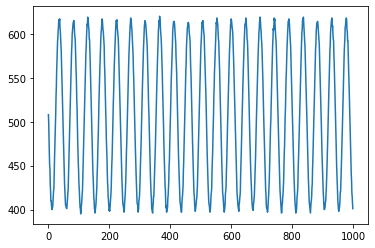

In [14]:
plot.plot(rec)

In [16]:
for 2*i,j in range(len(rec)):
    rece[j]=rec[i]

SyntaxError: can't assign to operator (<ipython-input-16-34b41dd5a558>, line 1)

In [17]:
half=[]
for i in range(len(test)):
    if i%2==0:
        half.append(test[i])

In [18]:
len(half)

250

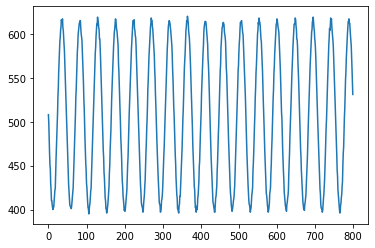

In [22]:
plot.plot(rec[0:800])

In [23]:
rec2 =[423, 412, 406, 399, 397, 398, 396, 391, 389, 392, 397, 397, 400, 404, 409, 413, 416, 420, 427, 439, 449, 454, 469, 478, 484, 497, 507, 514, 529, 535, 545, 551, 561, 568, 575, 583, 594, 594, 607, 609, 610, 617, 614, 613, 607, 596, 593, 590, 575, 561, 553, 534, 519, 505, 490, 474, 463, 446, 437, 426, 418, 407, 401, 397, 396, 395, 399, 400, 406, 412, 419, 424, 440, 451, 469, 484, 496, 515, 525, 542, 555, 566, 577, 590, 600, 604, 614, 612, 618, 618, 613, 607, 598, 593, 588, 579, 564, 554, 536, 524, 506, 496, 476, 465, 448, 441, 425, 418, 406, 405, 397, 398, 394, 396, 401, 406, 412, 419, 421, 444, 456, 468, 483, 493, 510, 524, 539, 554, 565, 582, 589, 601, 604, 609, 616, 616, 618, 611, 604, 599, 595, 594, 579, 563, 553, 538, 525, 512, 492, 480, 467, 450, 442, 425, 418, 410, 402, 397, 394, 395, 397, 402, 408, 412, 420, 422, 441, 455, 465, 480, 497, 509, 524, 543, 558, 565, 578, 590, 596, 607, 612, 615, 619, 614, 614, 608, 602, 595, 588, 579, 566, 554, 538, 523, 514, 497, 483, 467, 449, 439, 431, 418, 410, 406, 402, 394, 396, 397, 402, 411, 413, 420, 422, 443, 451, 468, 479, 494, 509, 528, 539, 557, 564, 577, 589, 601, 606, 612, 616, 616, 618, 617, 607, 602, 595, 590, 585, 571, 554, 542, 529, 515, 499, 479, 467, 451, 440, 428, 421, 410, 407, 398, 398, 395, 400, 406, 411, 411, 421, 423, 441, 450, 465, 478, 494, 509, 525, 539, 554, 571, 576, 588, 600, 611, 611, 616, 619, 616, 611, 607, 601, 596, 593, 584, 569, 554, 543, 530, 511, 500, 484, 467, 457, 443, 428, 421, 412, 405, 399, 397, 398, 401, 403, 410, 415, 421, 423, 438, 449, 463, 482, 493, 507, 523, 538, 552, 566, 580, 587, 600, 610, 610, 614, 616, 617, 612, 611, 604, 595, 591, 583, 569, 556, 548, 528, 514, 500, 485, 468, 459, 444, 428, 422, 411, 403, 399, 395, 398, 400, 405, 410, 418, 419, 423, 437, 450, 461, 477, 490, 510, 522, 541, 555, 563, 578, 592, 594, 606, 614, 613, 620, 615, 617, 607, 606, 597, 590, 583, 568, 555, 545, 527, 515, 501, 486, 465, 452, 442, 430, 420, 412, 406, 399, 401, 399, 398, 400, 410, 409, 418, 424, 436, 449, 464, 476, 489, 505, 524, 536, 555, 563, 573, 587, 597, 604, 612, 612, 618, 616, 615, 608, 602, 598, 593, 584, 571, 555, 544, 531, 519, 498, 482, 468, 455, 443, 431, 420, 417, 402, 404, 402, 394, 396, 403, 406, 411, 417, 423, 436, 448, 462, 474, 491, 510, 524, 538, 548, 563, 578, 590, 595, 609, 608, 613, 615, 616, 613, 611, 606, 599, 595, 584, 572, 562, 547, 530, 519, 500, 482, 469, 455, 444, 432, 421, 416, 405, 398, 399, 399, 396, 404, 408, 415, 422, 421, 434, 448, 460, 474, 490, 505, 523, 537, 553, 566, 575, 583, 594, 602, 608, 613, 615, 620, 618, 613, 606, 597, 594, 586, 570, 560, 547, 531, 520, 500, 489, 470, 457, 445, 437, 422, 418, 405, 402, 399, 397, 397, 402, 408, 412, 416, 422, 438, 449, 460, 479, 488, 506, 522, 538, 548, 560, 572, 585, 594, 603, 609, 617, 615, 619, 619, 612, 607, 599, 592, 586, 572, 560, 548, 530, 520, 501, 485, 474, 462, 444, 436, 422, 417, 405, 401, 399, 394, 395, 402, 408, 415, 416, 421, 436, 450, 457, 477, 492, 503, 519, 538, 547, 560, 573, 583, 594, 602, 608, 615, 617, 621, 617, 613, 603, 601, 594, 591, 572, 559, 546, 531, 518, 502, 486, 476, 462, 446, 436, 429, 417, 407, 401, 398, 395, 394, 398, 404, 410, 418, 423, 430, 448, 456, 475, 491, 504, 516, 537, 546, 562, 571, 582, 592, 606, 608, 615, 616, 622, 613, 610, 607, 602, 593, 586, 572, 560, 546, 537, 522, 503, 487, 475, 461, 446, 436, 422, 415, 406, 400, 398, 397, 398, 398, 407, 410, 416, 422, 431, 445, 462, 473, 488, 501, 515, 534, 547, 563, 571, 580, 596, 601, 607, 616, 613, 618, 615, 610, 605, 598, 594, 587, 573, 561, 548, 537, 517, 506, 491, 473, 462, 450, 438, 422, 413, 406, 403, 399, 395, 393, 401, 406, 415, 416, 419, 433, 448, 457, 472, 486, 500, 516, 533, 546, 558, 574, 585, 594, 602, 607, 617, 619, 617, 616, 614, 604, 598, 594, 588, 575, 563, 549, 537, 519, 503, 493, 478, 459, 452, 436, 429, 414, 406, 401, 397, 395, 398, 402, 408, 414, 415, 423, 431, 446, 457, 470, 489, 500, 513, 530, 545, 559, 574, 582, 590, 601, 606, 615, 616, 617, 613, 614, 608, 603, 593, 588, 574, 565, 548, 538, 520, 508, 491, 478, 462, 451, 437, 429, 421, 410, 402, 398, 395, 398, 400, 405, 410, 413, 422, 426, 444, 457, 469, 482, 502, 515, 529, 546, 560, 572, 586, 592, 600, 608, 611, 614, 619, 615, 612, 604, 605, 593, 592, 576, 566, 552, 540, 520, 505, 492, 478, 464, 451, 440, 425, 416, 407, 403, 399, 394, 397, 401, 405, 412, 417, 420, 424, 443, 454, 468, 486, 500, 518, 531, 544, 561, 572, 583, 591, 600, 607, 612, 614, 616, 616, 612, 605, 598, 597, 592, 580, 567, 556, 538, 524, 505, 492, 476, 462, 446, 437, 426, 420, 409, 407, 399, 394, 397, 400, 408, 410, 417, 418, 429, 443, 454, 468, 485, 497, 512, 528, 547, 560, 572, 581, 594, 598, 606, 611, 613, 618, 615, 614, 607, 604, 600, 593, 575, 567, 551, 539, 524, 505, 491, 478, 462, 449, 439, 431, 419, 411, 403, 398, 397, 399, 399, 404, 407, 417, 419, 427, 441, 456, 467, 481, 496, 515, 526, 547, 555, 568, 582, 589, 599, 608, 609, 613, 617, 615, 611, 610, 602, 593, 592, 579, 566, 551, 537, 524, 509, 492, 480, 463, 452, 442, 428, 421, 408, 404, 402, 400, 394, 396, 404, 409, 415, 418, 424, 441, 455, 471, 484, 495, 513, 530, 542, 557, 572, 580, 589, 598, 607, 611, 614, 617, 619, 609, 605, 604, 597, 591, 583, 570, 556, 538, 524, 508, 494, 478, 464, 450, 444, 427, 421, 413, 406, 400, 397, 395, 397, 401, 405, 412, 417, 424, 444, 456, 465, 481, 492, 510, 528, 545, 554, 571, 577, 588, 596, 608, 611, 617, 615, 620, 612, 611, 604, 598, 589, 582, 566, 556, 539, 524, 509, 494, 478, 466, 454, 444, 432, 419, 411, 402, 401, 398, 396, 402, 404, 405, 412, 419, 425, 443, 454, 464, 479, 493, 513, 526, 539, 553, 569, 578, 589, 597, 608, 611, 613, 616, 620, 616, 608, 601, 596, 590, 582, 566, 555, 545, 525, 509, 495, 478, 471, 458, 443, 431, 421, 413, 403, 400, 397, 395, 397, 403, 410, 414, 418, 427, 441, 453, 468, 481, 496, 510, 524, 540, 553, 567, 576, 593, 599, 610, 610, 618, 620, 620, 613, 608, 600, 596, 592, 580, 566, 554, 543, 528, 511, 500, 479, 468, 457, 444, 432, 424, 411, 404, 400, 397, 397, 400, 402, 412, 413, 421, 427, 442, 454, 468, 479, 490, 508, 525, 538, 552, 568, 576, 591, 601, 610, 614, 617, 615, 619, 615, 606, 602, 600, 591, 580, 567, 556, 544, 531, 517, 496, 484, 472, 456, 444, 432, 423, 412, 407, 399, 396, 395, 395, 400, 409, 411, 420, 427, 440, 450, 461, 475, 491, 506, 522, 536, 551, 563, 579, 590, 596, 610, 609, 613, 616, 616, 615, 609, 601, 598, 590, 586, 567, 560, 541, 526, 513, 499, 481, 471, 454, 443, 431, 422, 416, 405, 401, 401, 395, 396, 400, 410, 413, 421, 426, 434, 449, 461, 476, 490, 505, 524, 536, 555, 563, 574, 589, 596, 606, 613, 615, 616, 619, 617, 608, 603, 598, 590, 586, 569, 555, 547, 532, 517, 500, 486, 468, 455, 444, 431, 420, 412, 404, 402, 400, 396, 400, 401, 405, 411, 420, 424, 438, 450, 460, 475, 488, 505, 524, 535, 550, 562, 578, 589, 600, 608, 614, 619, 620, 617, 615, 609, 603, 598, 594, 589, 572, 559, 548, 531, 511, 499, 484, 468, 456, 443, 432, 418, 414, 408, 400, 403, 397, 396, 400, 407, 414, 420, 423, 438, 447, 463, 474, 489, 504, 520, 533, 553, 561, 578, 590, 598, 605, 612, 613, 617, 617, 616, 610, 603, 596, 596, 591, 573, 559, 544, 530, 513, 500, 485, 470, 461, 446, 432, 424, 414, 409, 405, 399, 395, 399, 400, 408, 411, 418, 422, 434, 447, 458, 474, 488, 504, 522, 536, 552, 564, 574, 587, 596, 604, 607, 613, 616, 622, 615, 610, 606, 598, 597, 591, 572, 560, 549, 530, 516, 501, 485, 469, 460, 445, 432, 423, 415, 406, 403, 399, 400, 398, 398, 407, 412, 417, 422, 437, 446, 463, 477, 487, 507, 522, 532, 550, 560, 570, 584, 596, 603, 607, 613, 615, 615, 618, 610, 606, 600, 594, 589, 575, 559, 551, 533, 517, 501, 485, 471, 457, 445, 439, 422, 417, 410, 404, 401, 395, 395, 399, 404, 411, 416, 421, 430, 450, 461, 471, 489, 502, 519, 530, 545, 560, 574, 583, 595, 600, 612, 612, 619, 616, 614, 615, 607, 598, 596, 587, 575, 563, 548, 532, 518, 503, 486, 476, 457, 445, 437, 428, 416, 409, 400, 397, 393, 395, 399, 404, 413, 419, 420, 430, 445, 462, 475, 491, 502, 514, 531, 548, 559, 572, 583, 592, 601, 609, 612, 615, 616, 618, 610, 608, 598, 595, 592, 575, 561, 547, 533, 520, 505, 486, 470, 458, 445, 437, 427, 419, 406, 401, 400, 395, 396, 399, 404, 409, 415, 421, 433, 446, 457, 472, 488, 506, 517, 535, 546, 558, 569, 581, 592, 601, 608, 611, 616, 620, 618, 610, 606, 604, 593, 585, 573, 562, 548, 534, 522, 502, 492, 474, 464, 446, 435, 425, 415, 407, 404, 399, 400, 394, 398, 406, 410, 415, 425, 430, 448, 457, 474, 488, 504, 520, 530, 544, 559, 570, 582, 591, 602, 610, 614, 618, 617, 617, 609, 606, 600, 595, 589, 579, 562, 553, 534, 524, 509, 492, 474, 460, 446, 438, 428, 418, 408, 407, 397, 397, 395, 398, 403, 412, 416, 423, 433, 447, 459, 470, 487, 497, 513, 529, 545, 557, 572, 585, 589, 603, 611, 615, 616, 616, 616, 610, 607, 600, 595, 594, 578, 562, 552, 538, 526, 509, 494, 477, 460, 447, 438, 428, 416, 406, 405, 402, 394, 396, 398, 406, 411, 412, 422, 428, 442, 454, 473, 484, 498, 518, 534, 549, 560, 570, 584, 591, 603, 609, 613, 612, 620, 619, 613, 607, 602, 594, 588, 579, 565, 550, 539, 525, 510, 494, 476, 463, 449, 437, 426, 415, 407, 401, 399, 399, 394, 402, 403, 413, 413, 418, 428, 443, 454, 473, 483, 502, 512, 529, 543, 555, 567, 580, 591, 602, 605, 613, 614, 620, 616, 610, 606, 599, 598, 592, 577, 570, 555, 539, 528, 506, 492, 477, 462, 449, 439, 426, 420, 409, 400, 398, 399, 399, 400, 403, 407, 413, 421, 426, 443, 454, 468, 486, 499, 511, 528, 546, 559, 572, 582, 588, 601, 609, 610, 613, 614, 615, 610, 606, 600, 596, 589, 577, 564, 555, 544, 528, 508, 494, 477, 462, 451, 439, 427, 420, 407, 405, 399, 400, 399, 401, 406, 410, 413, 420, 424, 442, 452, 466, 480, 495, 514, 527, 543, 558, 565, 580, 590, 599, 607, 609, 612, 615, 615, 611, 606, 605, 594, 594, 580, 570, 556, 543, 524, 511, 498, 483, 465, 451, 439, 426, 417, 409, 404, 403, 396, 398, 399, 405, 409, 412, 420, 425, 440, 451, 465, 483, 496, 510, 529, 540, 558, 565, 578, 593, 598, 606, 613, 613, 620, 616, 616, 610, 603, 595, 591, 580, 565, 553, 540, 526, 513, 497, 483, 464, 451, 444, 428, 420, 413, 407, 402, 399, 398, 399, 401, 413, 417, 418, 423, 443, 455, 465, 483, 498, 513, 529, 539, 554, 568, 579, 588, 597, 605, 613, 613, 616, 617, 617, 607, 605, 599, 593, 579, 569, 555, 540, 526, 515, 496, 480, 465, 452, 443, 432, 418, 413, 406, 400, 397, 397, 400, 399, 406, 412, 419, 424, 440, 454, 465, 483, 495, 513, 523, 543, 556, 566, 577, 587, 597, 610, 610, 613, 615, 616, 613, 609, 602, 595, 592, 584, 568, 556, 540, 531, 511, 497, 480, 470, 456, 442, 433, 418, 409, 406, 399, 396, 399, 400, 404, 406, 412, 423, 422, 438, 450, 464, 483, 491, 509, 525, 541, 554, 564, 576, 588, 595, 606, 609, 617, 616, 620, 616, 606, 602, 595, 592, 582, 567, 555, 544, 527, 511, 497, 486, 467, 458, 442, 429, 420, 415, 404, 400, 397, 398, 397, 403, 410, 411, 417, 423, 439, 455, 461, 480, 495, 507, 523, 537, 551, 565, 575, 587, 597, 607, 608, 618, 620, 615, 617, 606, 604, 596, 593, 582, 569, 556, 544, 528, 517, 498, 486, 469, 458, 442, 434, 420, 414, 405, 399, 398, 395, 400, 400, 406, 412, 418, 426, 434, 448, 466, 477, 491, 506, 522, 535, 550, 564, 575, 586, 596, 605, 609, 614, 619, 618, 616, 610, 604, 601, 592, 583, 569, 557, 543, 527, 513, 503, 485, 473, 461, 448, 432, 424, 413, 405, 400, 402, 393, 396, 401, 410, 416, 420, 426, 432, 448, 463, 477, 491, 509, 519, 539, 549, 563, 579, 590, 597, 604, 609, 616, 616, 622, 613, 612, 604, 600, 592, 589, 569, 558, 545, 529, 516, 502, 482, 469, 456, 444, 432, 424, 413, 404, 403, 400, 394, 400, 404, 407, 411, 415, 423, 432, 450, 465, 474, 488, 507, 521, 539, 550, 564, 577, 589, 596, 608, 608, 612, 619, 618, 615, 611, 604, 598, 591, 584, 570, 560, 544, 532, 518, 502, 486, 470, 457, 444, 438, 421, 413, 405, 403, 401, 395, 399, 403, 407, 414, 417, 424, 434, 446, 457, 473, 488, 506, 519, 533, 551, 562, 578, 588, 593, 603, 611, 615, 617, 614, 613, 608, 603, 597, 591, 586, 572, 563, 544, 527, 517, 503, 486, 475, 457, 446, 432, 425, 414, 405, 402, 400, 395, 397, 399, 408, 413, 420, 421, 430, 447, 458, 473, 492, 501, 516, 534, 552, 562, 573, 587, 592, 603, 611, 613, 617, 615, 613, 608, 603, 600, 592, 591, 571, 558, 545, 535, 518, 504, 484, 475, 458, 448, 433, 422, 420, 408, 399, 402, 393, 399, 403, 408, 411, 414, 421, 434, 446, 460, 473, 486, 500, 521, 537, 547, 565, 572, 585, 592, 603, 609, 613, 616, 619, 613, 612, 604, 603, 595, 586, 572, 565, 547, 533, 516, 501, 486, 475, 459, 446, 433, 424, 415, 410, 401, 400, 396, 397, 400, 406, 410, 415, 419, 433, 445, 457, 472, 489, 503, 521, 535, 550, 563, 576, 586, 594, 602, 608, 613, 616, 618, 614, 610, 606, 600, 597, 590, 577, 565, 550, 533, 519, 503, 487, 472, 463, 446, 439, 425, 415, 410, 405, 399, 399, 399, 400, 408, 410, 418, 420, 429, 445, 460, 471, 488, 502, 518, 533, 547, 564, 575, 584, 594, 600, 609, 612, 615, 615, 615, 611, 609, 601, 596, 592, 572, 563, 550, 533, 520, 507, 492, 472, 463, 448, 440, 429, 414, 408, 401, 401, 397, 398, 400, 406, 410, 417, 420, 431, 445, 458, 470, 486, 498, 519, 533, 551, 558, 574, 582, 593, 600, 608, 611, 616, 615, 618, 614, 608, 601, 595, 588, 574, 561, 550, 535, 519, 506, 491, 477, 464, 452, 435, 429, 416, 410, 404, 400, 400, 395, 400, 406, 409, 414, 423, 427, 446, 459, 472, 488, 503, 517, 532, 544, 558, 569, 582, 592, 598, 608, 613, 619, 616, 615, 612, 608, 602, 599, 588, 579, 567, 548, 533, 521, 506, 490, 476, 462, 447, 440, 430, 417, 410, 400, 398, 396, 396, 398, 407, 409, 418, 423, 430, 441, 455, 468, 483, 500, 512, 530, 547, 557, 574, 579, 590, 598, 611, 612, 614, 617, 619, 611, 607, 599, 599, 589, 578, 562, 551, 539, 521, 505, 491, 474, 466, 453, 440, 427, 415, 408, 404, 400, 396, 397, 402, 401, 409, 415, 419, 430, 443, 454, 467, 483, 499, 512, 528, 546, 555, 570, 579, 594, 598, 607, 611, 617, 617, 618, 614, 607, 599, 596, 589, 576, 564, 552, 543, 526, 504, 496, 480, 465, 451, 441, 427, 415, 409, 403, 400, 395, 397, 399, 403, 411, 418, 423, 428, 441, 456, 469, 482, 496, 515, 528, 542, 555, 569, 581, 595, 600, 611, 612, 617, 616, 618, 613, 607, 600, 594, 589, 578, 568, 552, 537, 528, 506, 496, 480, 463, 451, 443, 427, 421, 409, 402, 399, 396, 397, 399, 402, 413, 414, 421, 428, 445, 454, 469, 480, 495, 512, 526, 542, 555, 568, 582, 592, 600, 608, 610, 615, 618, 617, 612, 610, 601, 594, 590, 578, 566, 557, 538, 528, 514, 493, 476, 464, 451, 444, 428, 420, 408, 405, 399, 396, 396, 399, 400, 411, 417, 420, 429, 444, 451, 467, 479, 494, 510, 529, 537, 559, 569, 582, 593, 597, 612, 609, 614, 618, 620, 613, 609, 602, 596, 591, 582, 566, 558, 540, 529, 513, 497, 478, 467, 453, 442, 427, 417, 410, 405, 402, 396, 398, 401, 406, 409, 416, 423, 424, 438, 452, 466, 480, 494, 510, 529, 538, 557, 570, 578, 592, 597, 605, 615, 614, 618, 616, 612, 607, 604, 597, 594, 582, 565, 559, 543, 528, 509, 496, 484, 464, 451, 444, 428, 419, 414, 404, 397, 400, 395, 397, 403, 405, 414, 421, 424, 437, 449, 464, 480, 493, 509, 523, 536, 556, 567, 578, 586, 601, 607, 613, 618, 615, 616, 613, 608, 602, 596, 594, 587, 567, 559, 541, 527, 511, 495, 479, 467, 452, 440, 428, 418, 409, 407, 399, 399, 399, 395, 402, 410, 413, 421, 424, 443, 450, 463, 479, 492, 508, 527, 538, 554, 567, 581]

In [24]:
len(rec2)

3000